In [ ]:
#
# 비모수 검정 :  1개 그룹, 독립 2개 그룹, 대응 2개 그룹 
# ├── 02 비모수 검정
# │   │
# │   ├── mannwhitneyu        (맨-휘트니 U 검정 - 중위수 , 윌콕슨 순위합 검정과 동일하다 볼 수 있음)
# │   ├── ranksums            (윌콕슨 순위합 검정 - 중위수)
# │   └── wilcoxon            (윌콕슨 부호 순위합 검정)

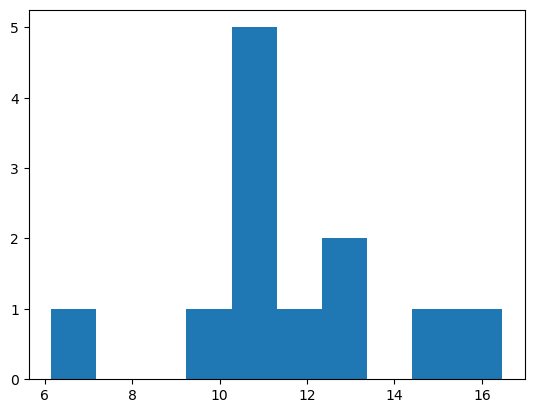

In [41]:
##################################################################################################################
# - 단일 표본 모평균 비모수 검정 : 정규성은 보장되지 않치만 대칭성은 보장되는 경우
# - Wilcoxon signed rank test 
##################################################################################################################

import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# 귀무가설 : 중앙값이 10 임
# 대립가설 : 중앙값이 10 아님

#
# **** 통계량 W+ 에 대한 이해
#
df1 = pd.DataFrame()
df1["x"] = [9.76, 11.1, 10.7,10.72,11.8,6.15,10.52,14.83,13.03,16.46,10.84,12.45]
df1["FI"] = np.where((df1["x"]-10) > 0, 1, 0)
df1["R"] = sp.rankdata(abs(x -10))
W = sum(df1["FI"] * df1["R"])    # 67.0

# 검정의 가정은 데이터가 대칭을 이룬다는 가정
# 별도 검정 방법은 없고 histogram 으로 시작적 확인할 수 밖에 없음
plt.hist(df1["x"])
plt.show()


# one sample 검정은 주어진 데이터에 귀무가설로 세워진 중앙값을 빼준다 :  https://www.youtube.com/watch?v=PGiXtngX3YQ
rank , p_value = sp.wilcoxon(df1["x"] - 10, alternative='two-sided')     # (11.0, 0.02685546875)
#
# **** 반환값 rank 에 대한 이해
#
# 파이선의 wilcoxon 의 경우 반환되는 통계량이 W+ 가 아니라 rank 의 합을 제공 (아래 메뉴얼 참고) 
# Manual)
# An object with the following attributes.
# statistic : array_like
#     If `alternative` is "two-sided", the sum of the ranks of the
#     differences above or below zero, whichever is smaller.
#     Otherwise the sum of the ranks of the differences above zero.
# pvalue : array_like
#     The p-value for the test depending on `alternative` and `method`.
#
# Example)
# alternatives 가 two-sided 인 경우
# rank 는 10보다 작은 것의 rank 와 10보다 큰것의 rank 중 작은 것을 반환함
# 	  x	    FI	 R
# 0	9.76	0	1.0         ← 10보다 작은 것 의 rank
# 1	11.10	1	6.0
# 2	10.70	1	3.0
# 3	10.72	1	4.0
# 4	11.80	1	7.0
# 5	6.15	0	10.0        ← 10보다 작은 것의 rank 
# 6	10.52	1	2.0
# 7	14.83	1	11.0
# 8	13.03	1	9.0
# 9	16.46	1	12.0
# 10	10.84	1	5.0
# 11	12.45	1	8.0
# 
# ***** p-vaxlue 에 대한 이해
#
# 특정 변수를 기준으로 왼편/오르편에 있는가에 대한 베르누이 확률 분포를 계산한 것

In [60]:
##################################################################################################################
# - 단일 표본 모평균 비모수 검정 : 정규성, 대칭성 모두 보장되지 않는 경우
# - Sign Test 
##################################################################################################################
from statsmodels.stats.descriptivestats import sign_test

x =  np.array([9.76, 11.1, 10.7,10.72,11.8,6.15,10.52,14.83,13.03,16.46,10.84,12.45])

#
# 사전조건 검토
# - 표본 내 귀무가설에서 고려하는 mu0(median) 가 있다면 이를 제외하고 검정 실행해야함!!
# 
x = x[x!=10]


#
# 부호검정 실행
#
sign_test(x, mu0 = 10)    # (4.0, 0.03857421875)

# Returns
# -------
# M
# p-value

# Notes
# -----
# The signs test returns

# M = (N(+) - N(-))/2        * R 에서는 큰놈의 개수만 가지고 실행

# where N(+) is the number of values above `mu0`, N(-) is the number of
# values below.  Values equal to `mu0` are discarded.

# The p-value for M is calculated using the binomial distribution
# and can be interpreted the same as for a t-test. The test-statistic
# is distributed Binom(min(N(+), N(-)), n_trials, .5) where n_trials
# equals N(+) + N(-).


(4.0, 0.03857421875)

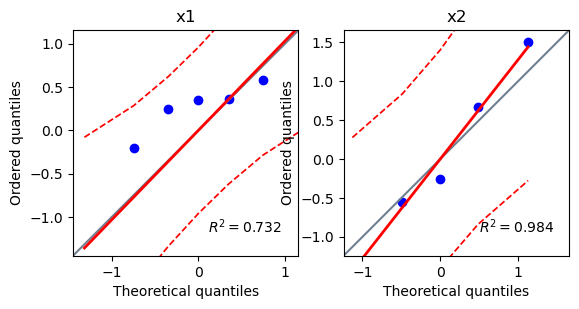

In [47]:
##################################################################################################################
# - 2 표본 모평균 비모수 검정 : 정규성 보장 X , 등분산성 보장 O , Unpaired Sample 
# - Mann Whitney Wilcoxon
##################################################################################################################

import pandas as pd
import numpy as np
import scipy.stats as sp
import pingouin as pg
import matplotlib.pyplot as plt

df2 =  pd.read_csv("./data/student_score2.csv")

x1 = np.array(df2[df2["gender"] == "female"]["score"])
x2 = np.array(df2[df2["gender"] == "male"]["score"])


#
# (1) 정규성 검토 : 비교대상 데이터(x1) 이 정규성을 만족하지 못함
# 
# qpplot 확인해보니 x1 의 정규성이 의심됨
plt.subplot(1,2,1)
plt.title("x1")
pg.qqplot(x1)
plt.subplot(1,2,2)
plt.title("x2")
pg.qqplot(x2)
# shaprio-wilk 검정해보니 x1 이 유의수준 5% 보다 작아 정규성을 갖는다 볼 수 없음
sp.shapiro(x1), sp.shapiro(x2)
# x1 : ShapiroResult(statistic=0.7618963718414307, pvalue=0.016863787546753883),
# x2 : ShapiroResult(statistic=0.9813238382339478, pvalue=0.9415760636329651))

#
# (2) 등분산성 검토
#
sp.levene(x1, x2, center="mean")    # LeveneResult(statistic=0.44335396709607755, pvalue=0.5205709507726324)
sp.levene(x1, x2, center="median")  # LeveneResult(statistic=0.4172193231540757, pvalue=0.5328693389697012)

#
# (3) Mann Whiteny Wilcoxson 검정 실행 : sp.wilcoxon() 은 paired 에서 사용함 !!!
#
sp.mannwhitneyu(x1, x2)             # MannwhitneyuResult(statistic=2.0, pvalue=0.010101010101010102)

# 검정 통계량 U : 그룹간 조합의 쌍 크기 비교 결과 중 작은 것 (R 에서는 큰 거줌) 
# 전체 조합의 개수 대비 U 의 비율이 0.5 에서 멀어지면 귀무가설을 기각하는 개념
U = 0
for x in x1:
    for y in x2:
        U = U + np.where(x>y, 1, 0)
U = U / (len(x1) * len(x2))            # 0.05714285714285714 → 0.5 기준으로 많이 떨어져있음

# ★ p-value 는 어떻게 계산되는 모르겠음. 개념만 U 기준으로 알고 실제는 p-value 기준으로 판단해야 할 듯

WilcoxonResult(statistic=2.0, pvalue=0.96875)

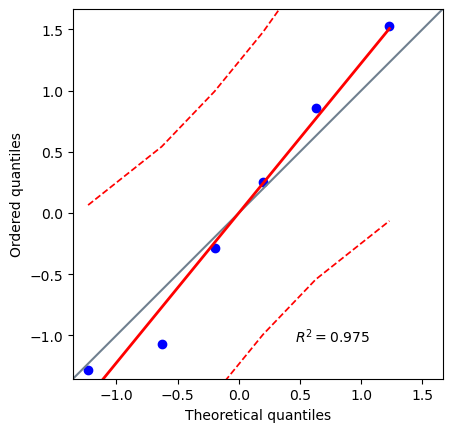

In [79]:
##################################################################################################################
# - 2 표본 모평균 비모수 검정 : 정규성 보장 X , 등분산성 보장 O , Paired Sample 
# - Wilcoxon Signed Rank Test
##################################################################################################################
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pingouin as pg

df4 = pd.read_csv("./data/student_score3.csv")
df4 = df4.pivot(index="id",columns="test",values="score")
x = np.array(df4["before"] - df4["after"])

# 정규성 보장되는 것으로 보임
pg.qqplot(x)
sp.shapiro(x)  # ShapiroResult(statistic=0.9559008479118347, pvalue=0.7876578569412231)

# - 귀무가설 : x <= 0
# - 대립가설 : x > 0 
sp.ttest_1samp(x, 0, alternative="greater")
# ShapiroResult(statistic=0.9559008479118347, pvalue=0.7876578569412231)

# 그래도 정규성 보장안된다고 가정하고 비모수하면
sp.wilcoxon(x, alternative="greater")
# WilcoxonResult(statistic=2.0, pvalue=0.96875)